In [1]:
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 16567, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 16567 (delta 23), reused 32 (delta 13), pack-reused 16522
Receiving objects: 100% (16567/16567), 15.02 MiB | 20.32 MiB/s, done.
Resolving deltas: 100% (11382/11382), done.
/content/yolov5
HEAD is now at 064365d8 Update parse_opt() in export.py to work as in train.py (#10789)


In [2]:

from roboflow import Roboflow
rf = Roboflow(api_key="xA3nmB30kcU5OPFYRoRA")
project = rf.workspace("breastcancer-vipgb").project("breast-cancer-and-milkduct")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to breast-cancer-and-milkduct-1 in yolov5pytorch:: 100%|██████████| 496/496 [00:00<00:00, 6036.14it/s]


In [3]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache


2024-04-28 14:28:05.361172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 14:28:05.361233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 14:28:05.362532: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-28 14:28:06.499121: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:0

In [4]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/breast-cancer-and-milkduct-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d8 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/9 /content/yolov5/breast-cancer-and-milkduct-1/test/images/-jnjn_PNG.rf.41e3fc9b4ab741bf3f972ce8ece60a47.jpg: 416x416 1 Cancer, 1 MilkDuct, 6.9ms
image 2/9 /content/yolov5/breast-cancer-and-milkduct-1/test/images/10_PNG.rf.8a174da3714504e8488a7ec9146a69e1.jpg:

In [5]:
# trained weights are saved by default in our weights folder
%ls runs/

detect/  train/


In [6]:
%ls runs/train/yolov5s_results/weights

ls: cannot access 'runs/train/yolov5s_results/weights': No such file or directory


In [7]:
%cd /content/yolov5/
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source /content/yolov5/breast-cancer-and-milkduct-1/test/images


/content/yolov5
detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/breast-cancer-and-milkduct-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d8 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/9 /content/yolov5/breast-cancer-and-milkduct-1/test/images/-jnjn_PNG.rf.41e3fc9b4ab741bf3f972ce8ece60a47.jpg: 416x416 1 Cancer, 7.1ms
image 2/9 /content/yolov5/breast-cancer-and-milkduct-1/test/images/10_PNG.rf.8a174da3714504e84

test the **model**

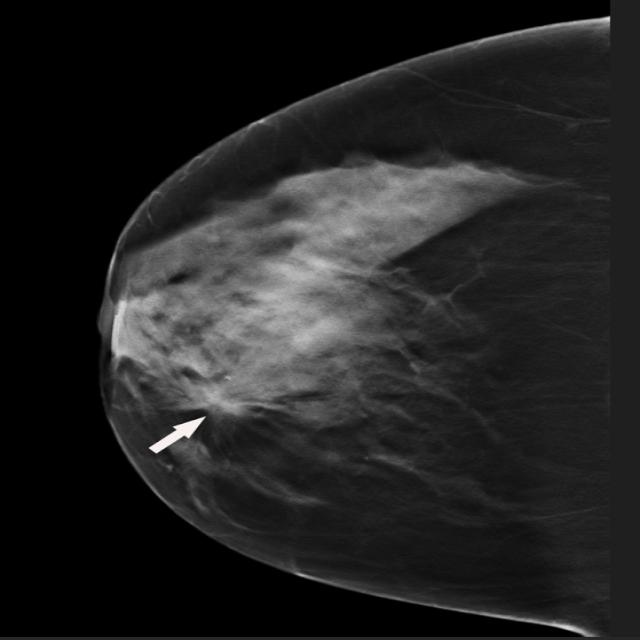

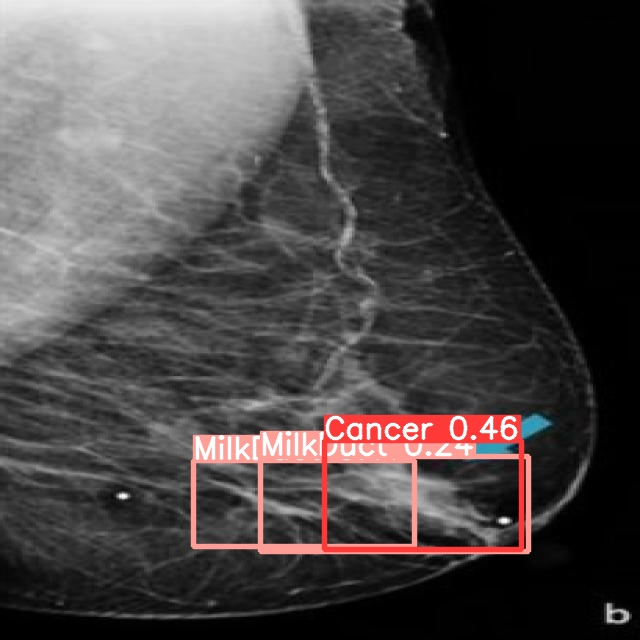

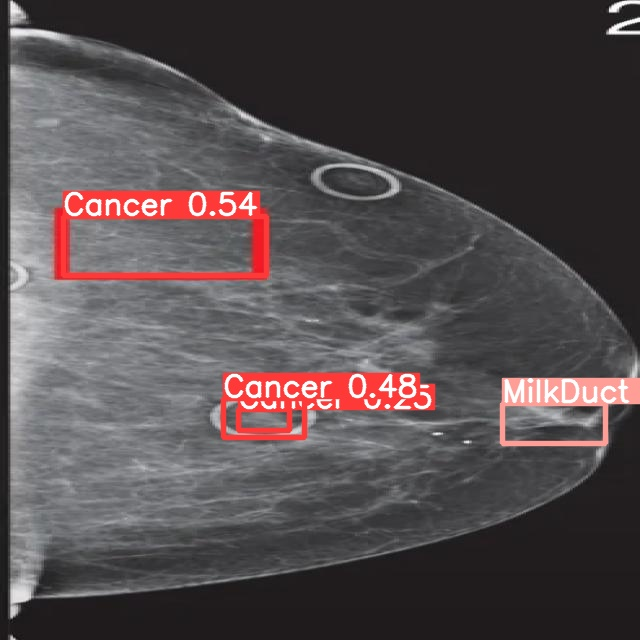

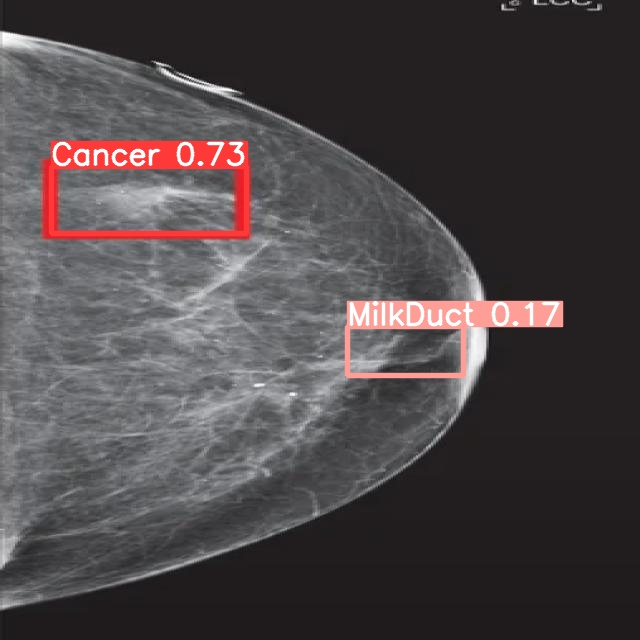

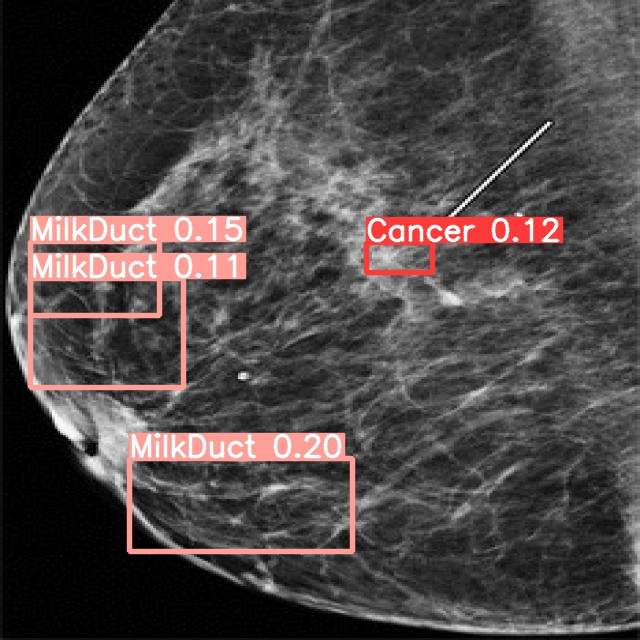

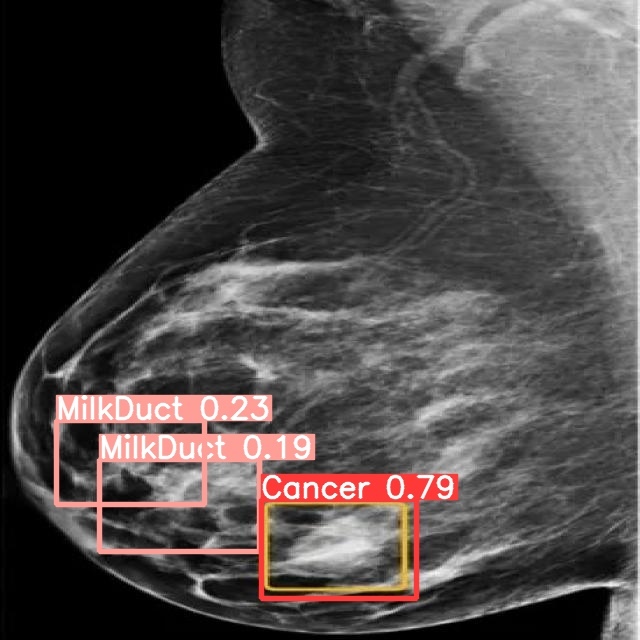

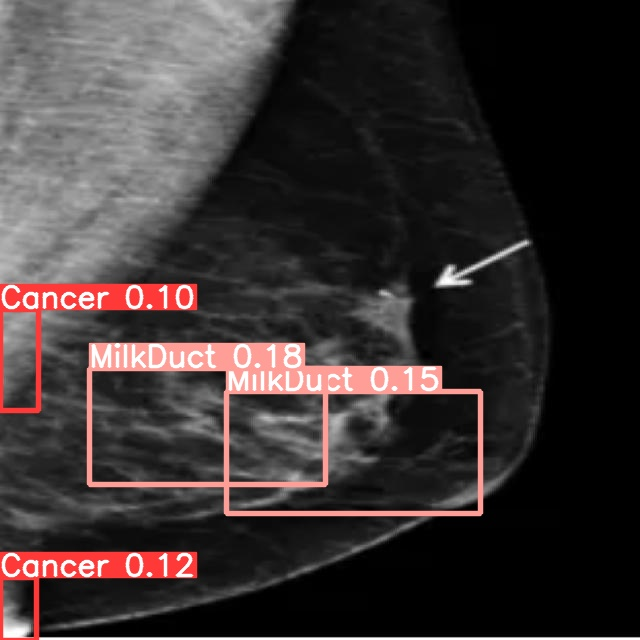

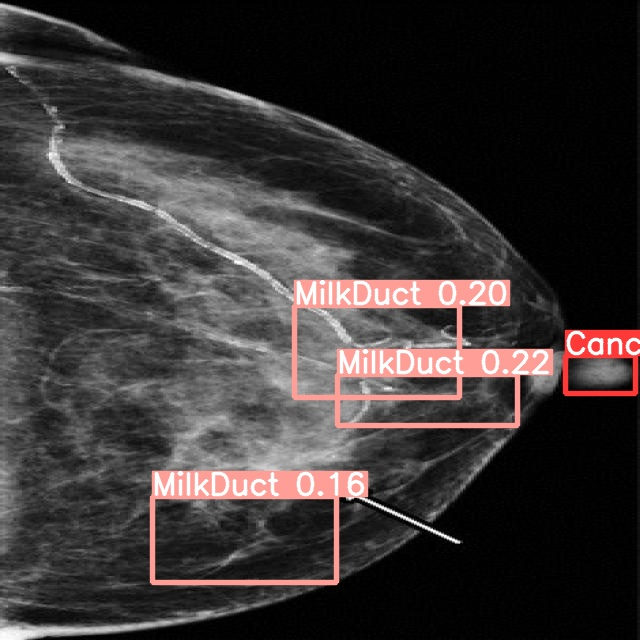

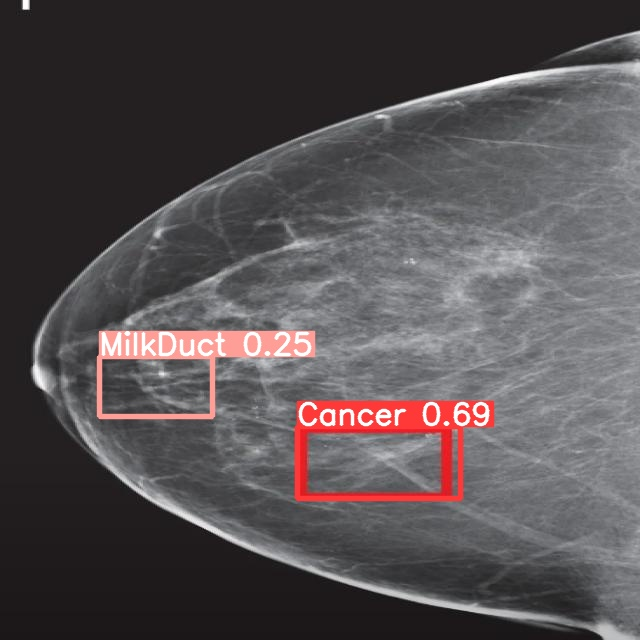

In [9]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))


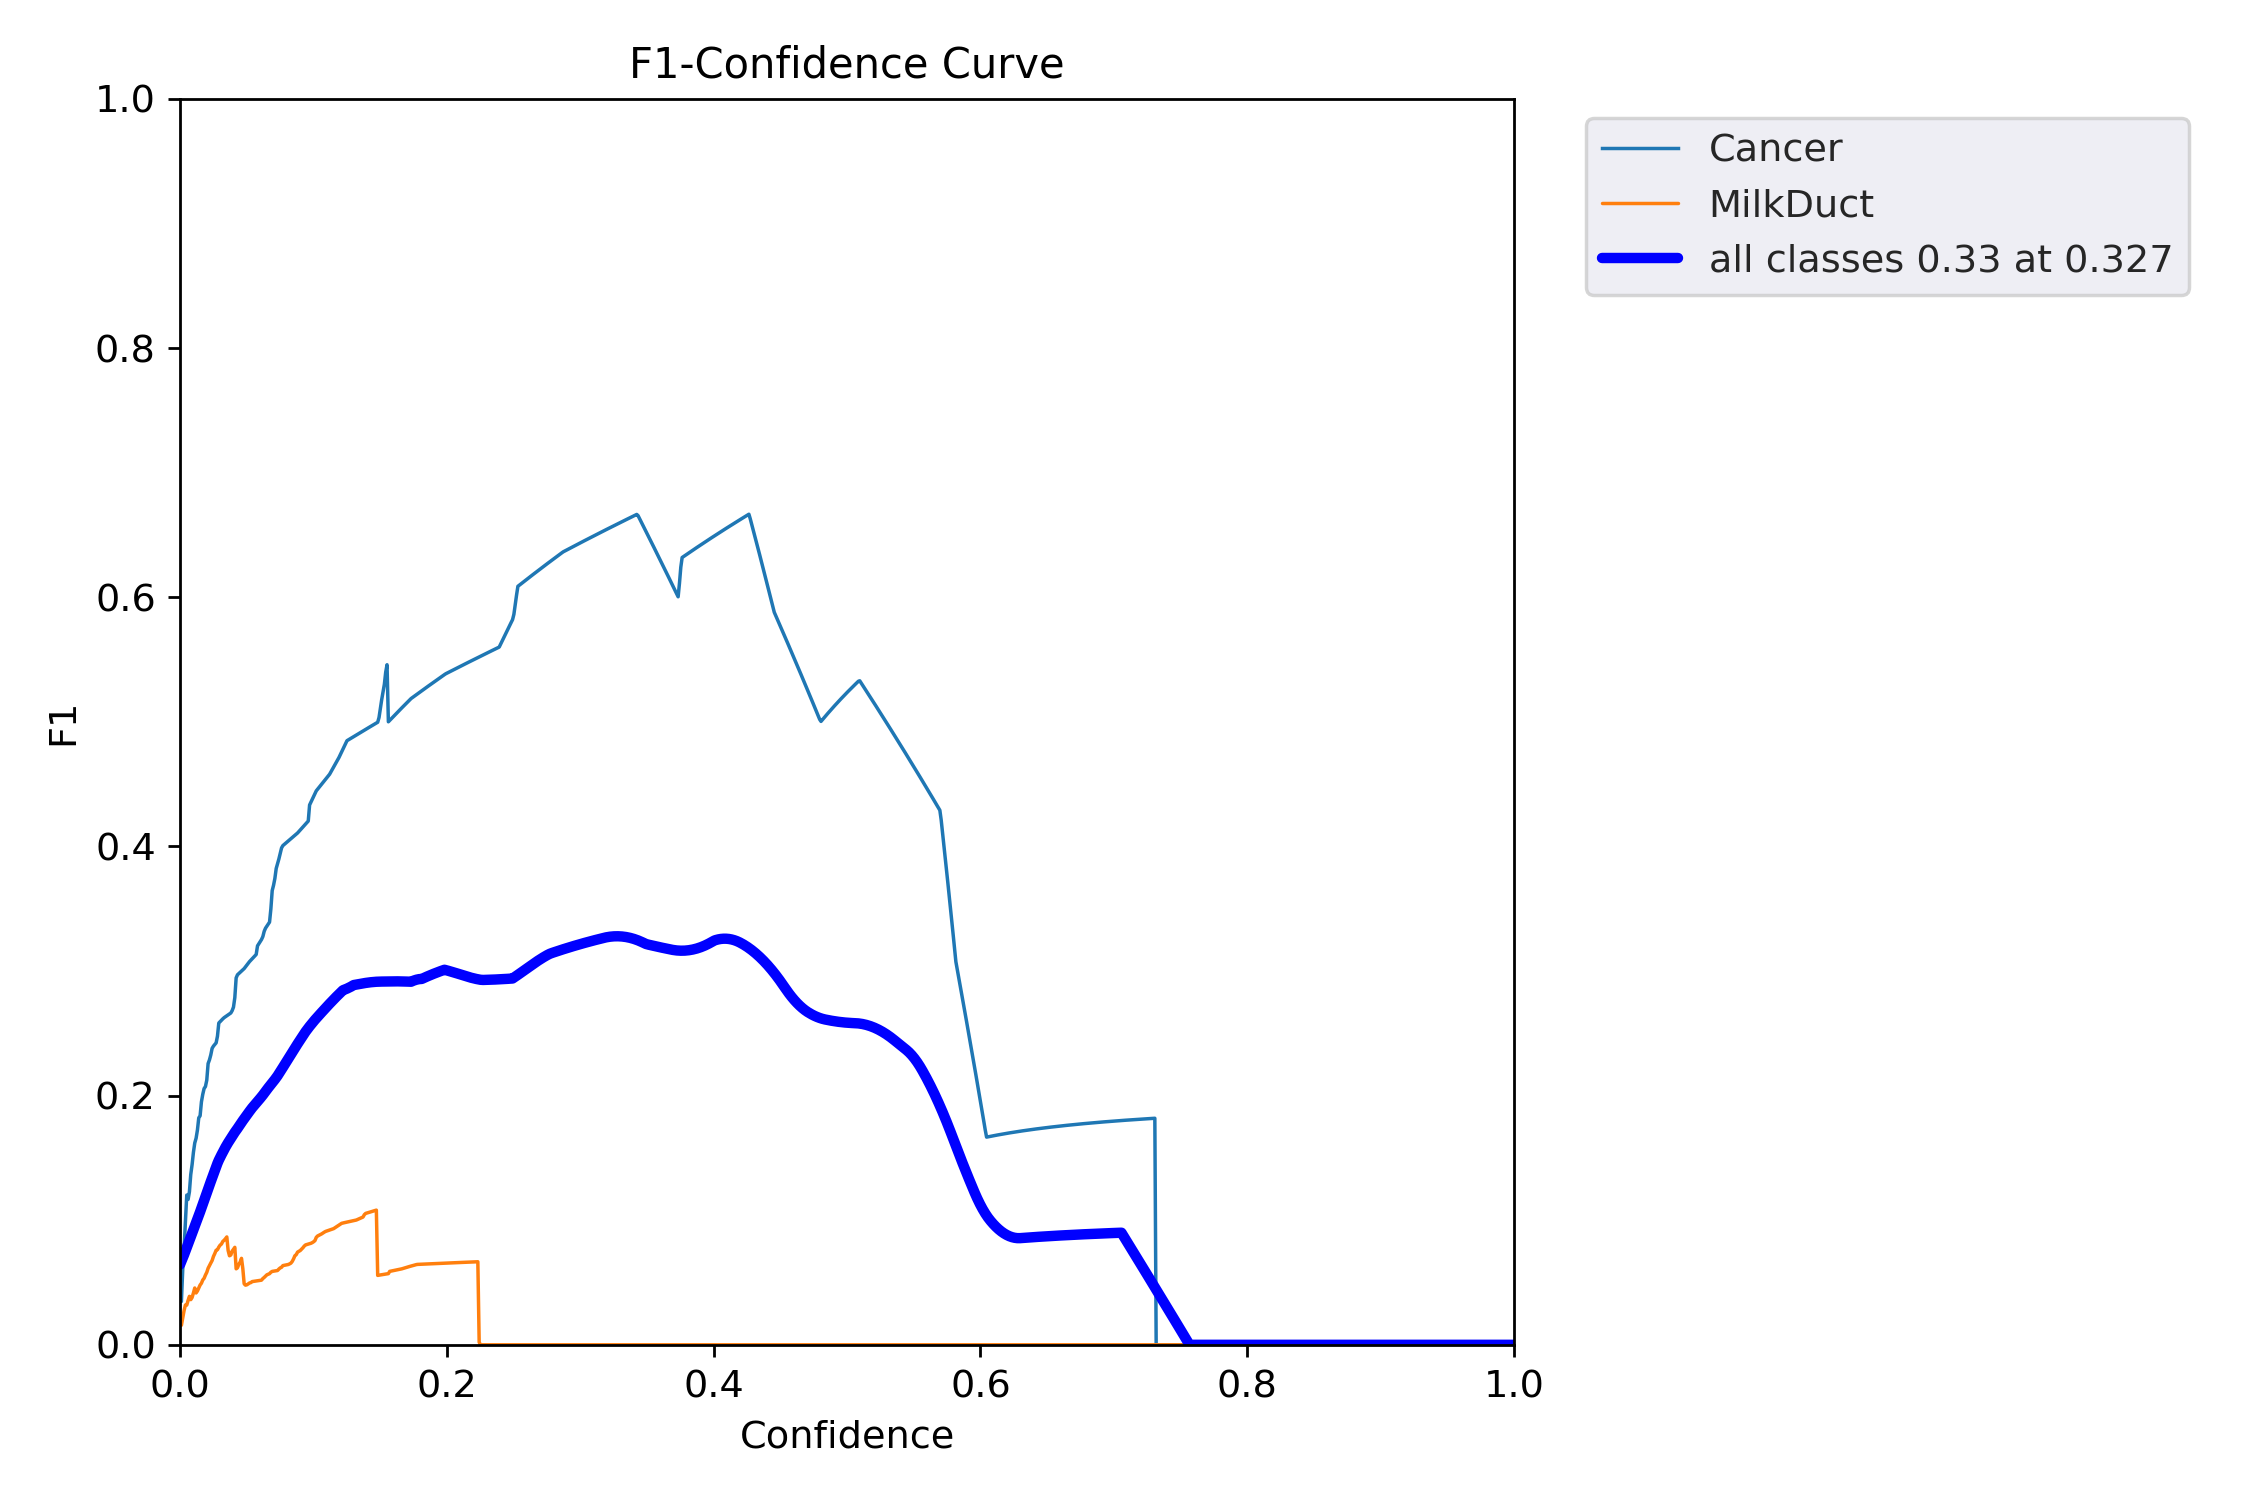

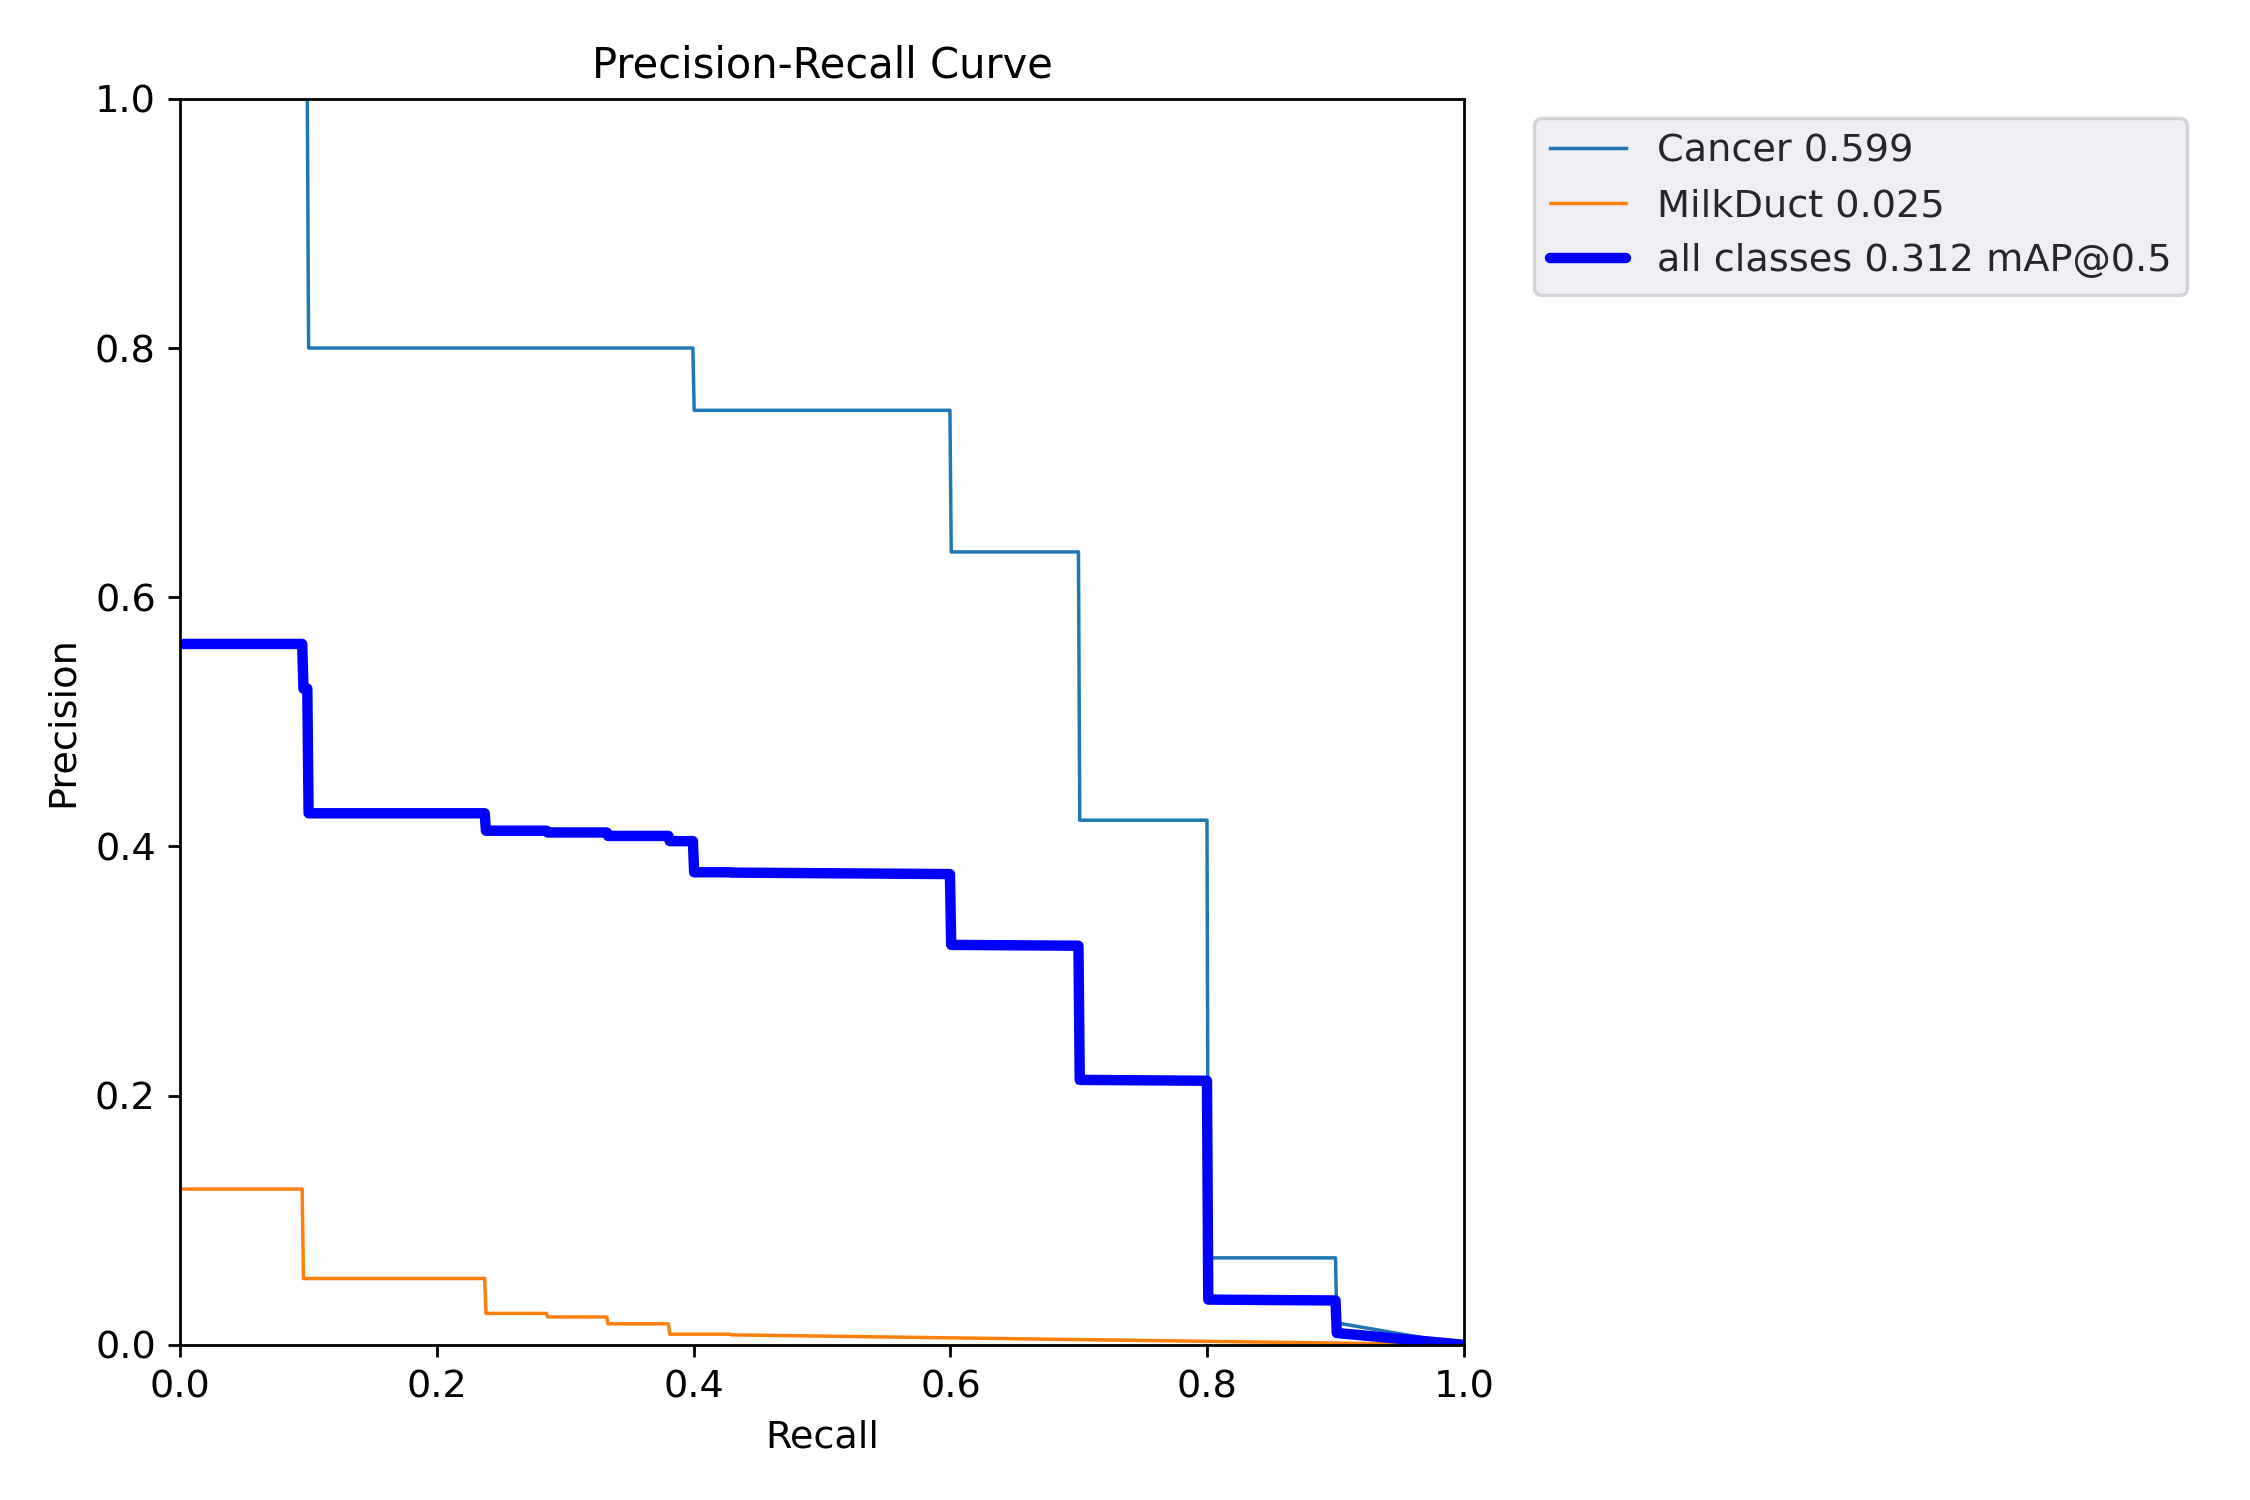

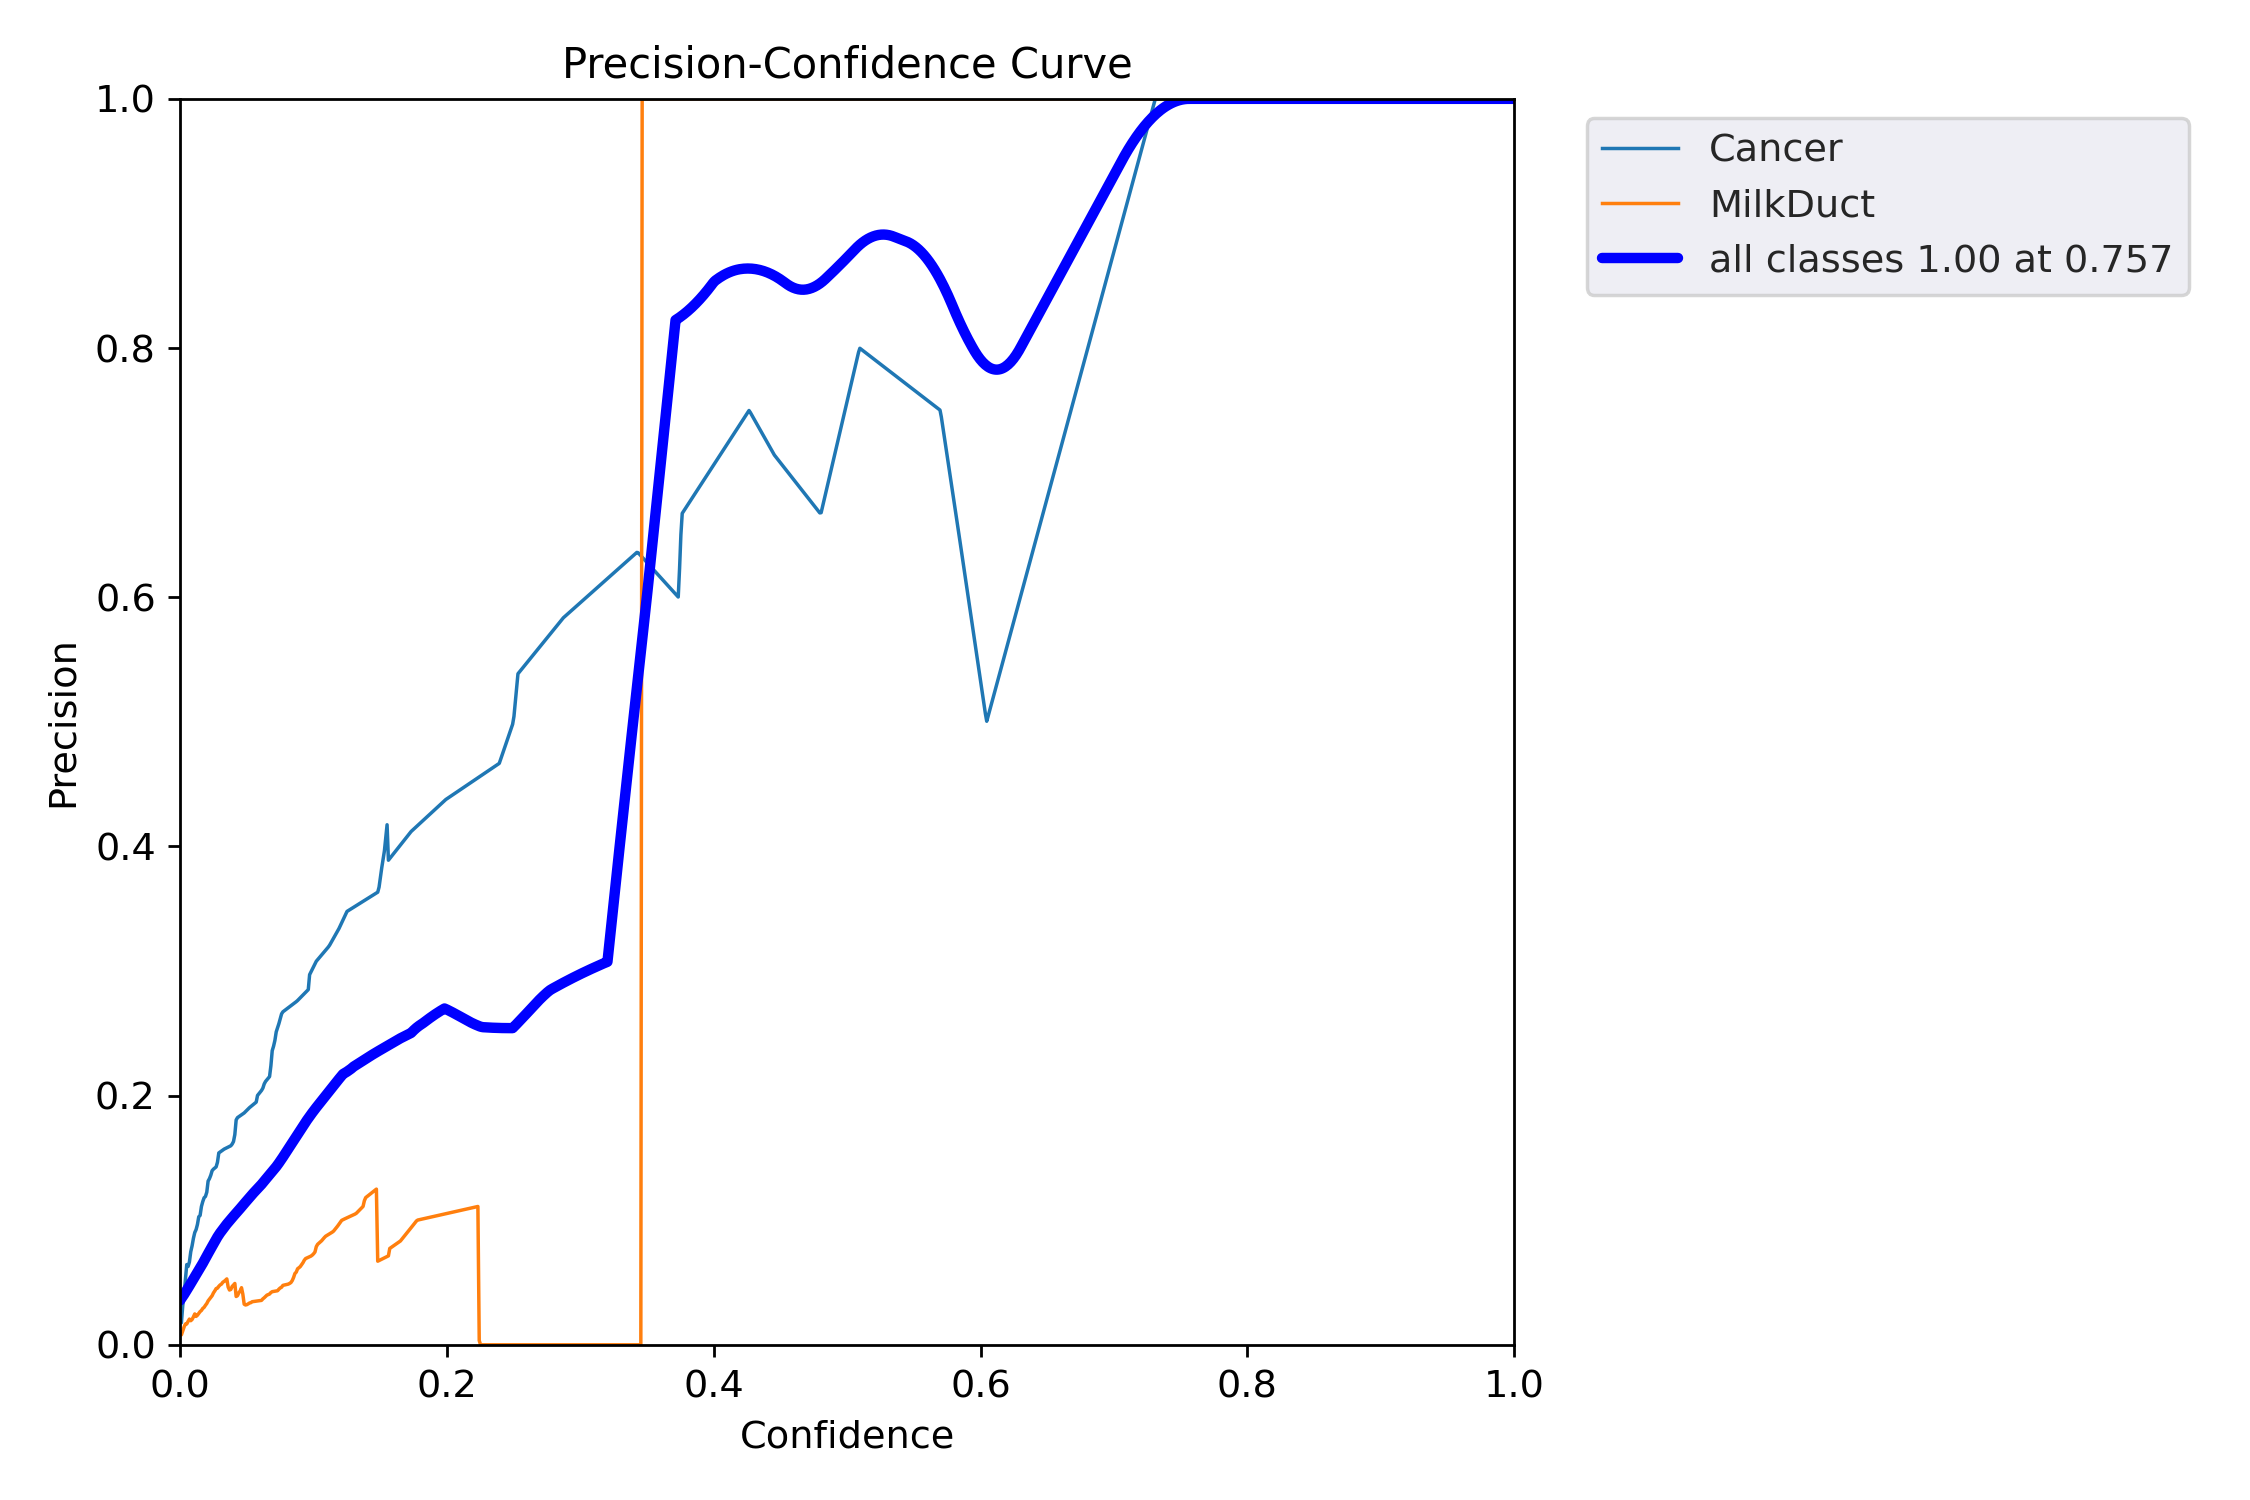

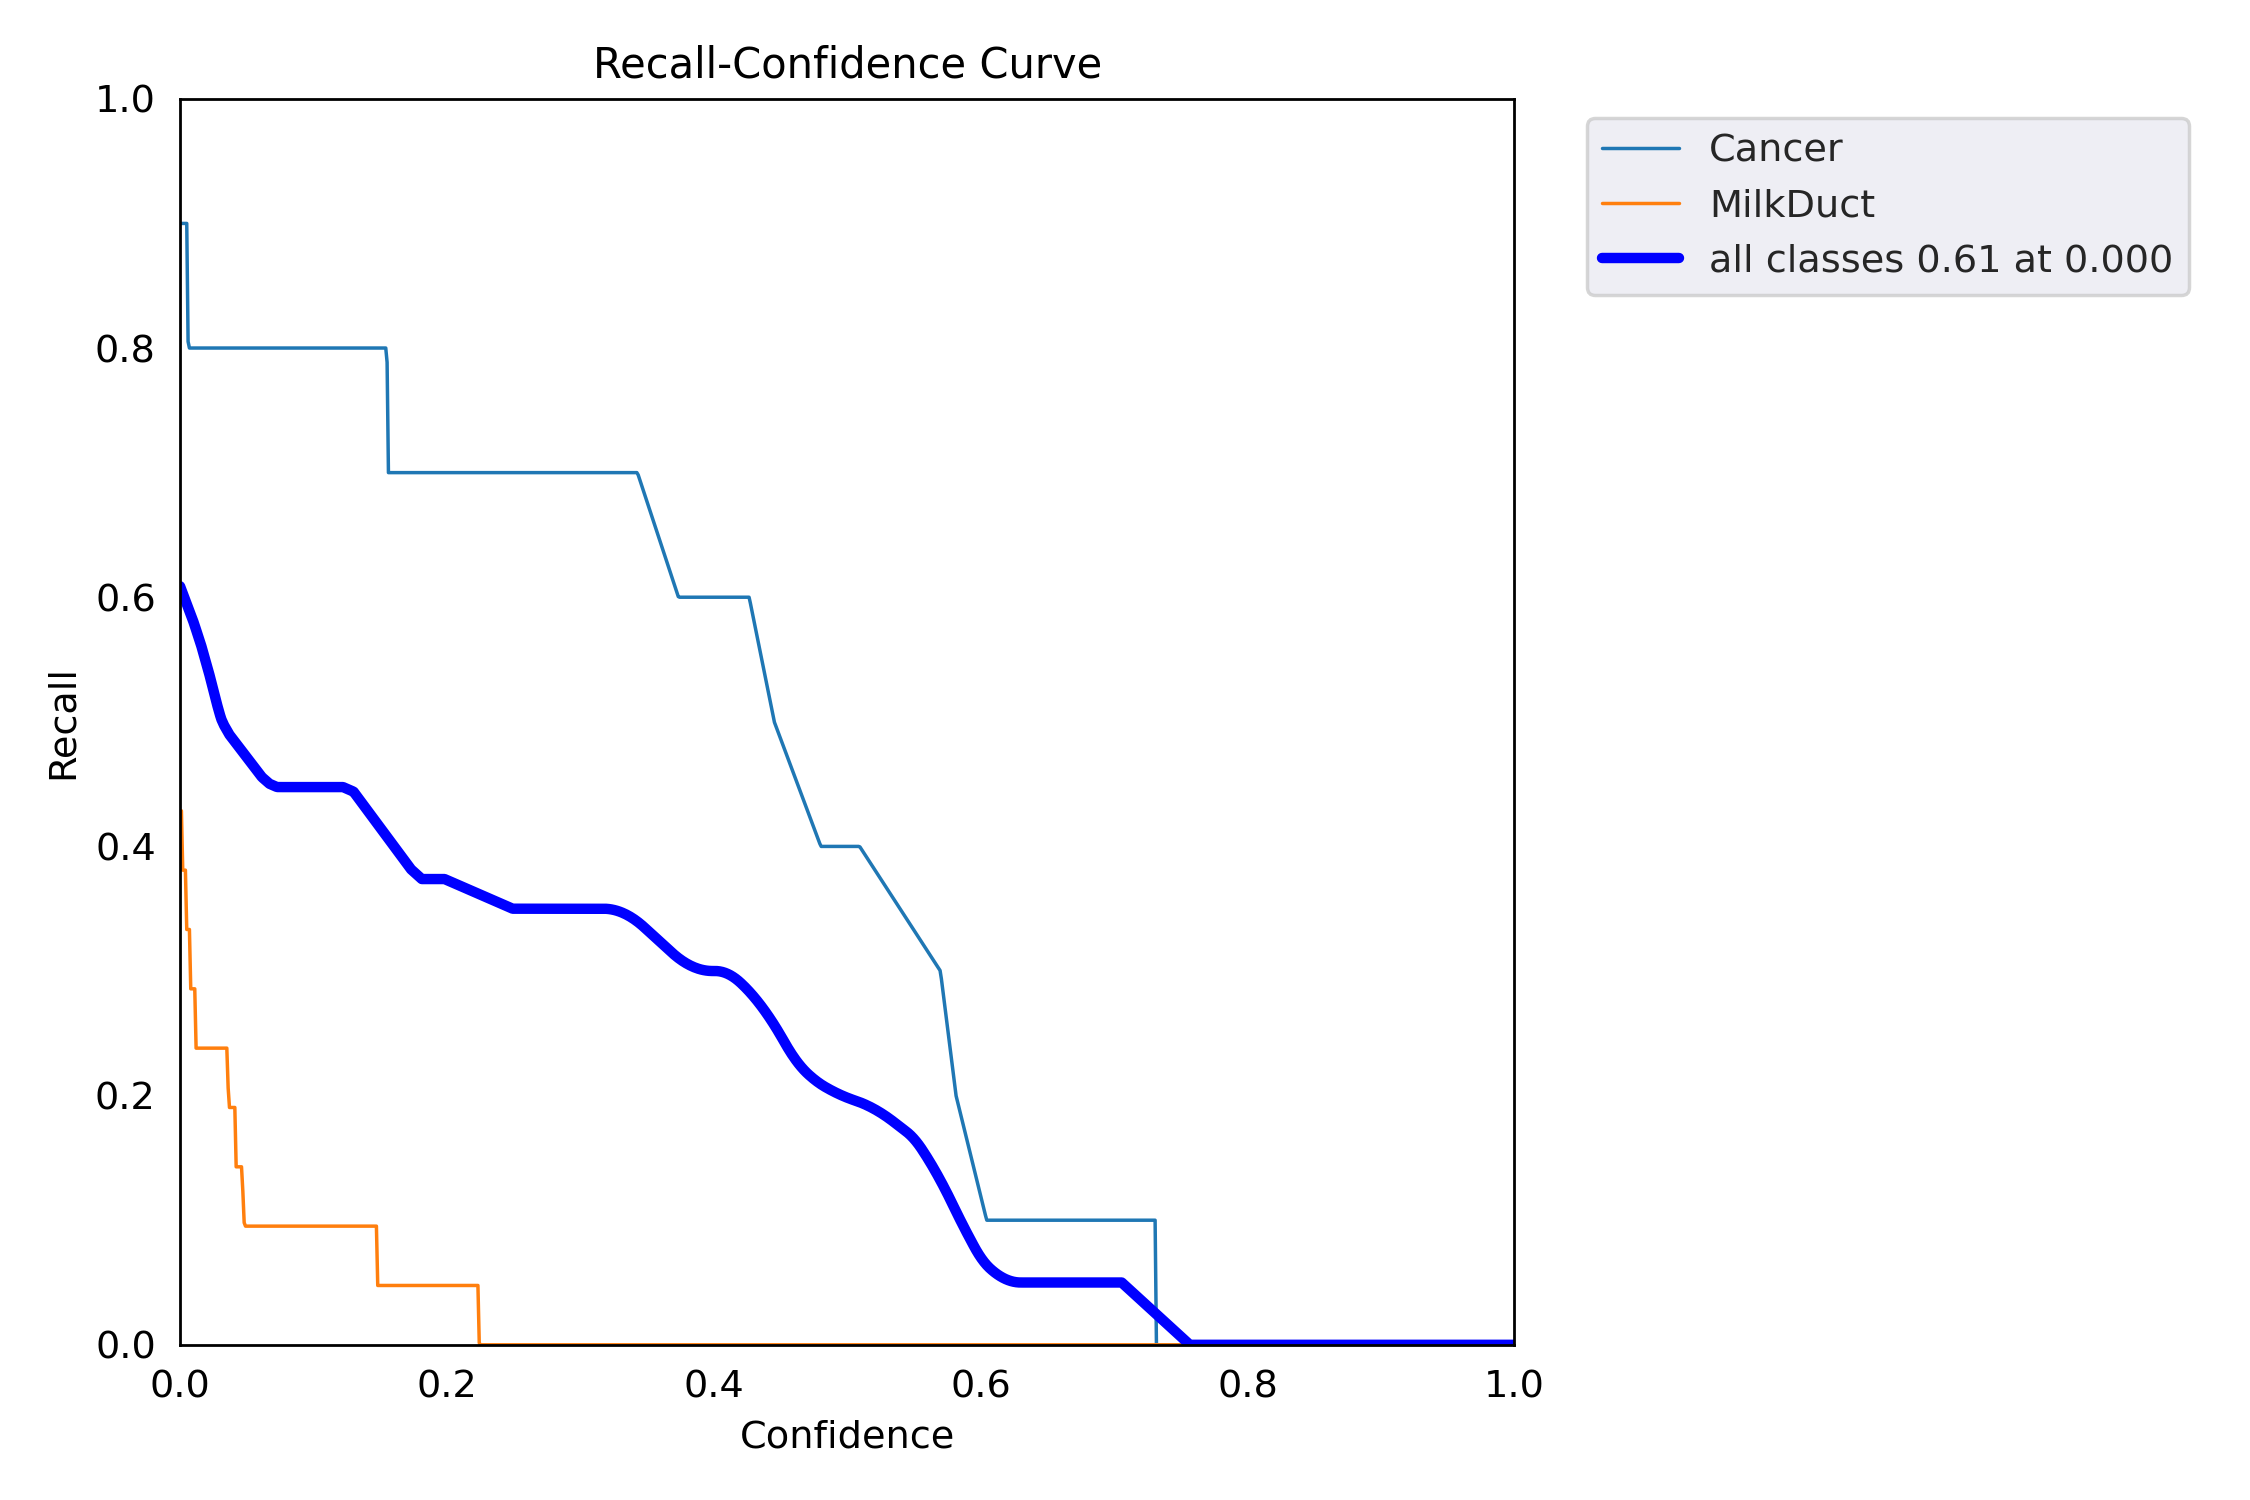

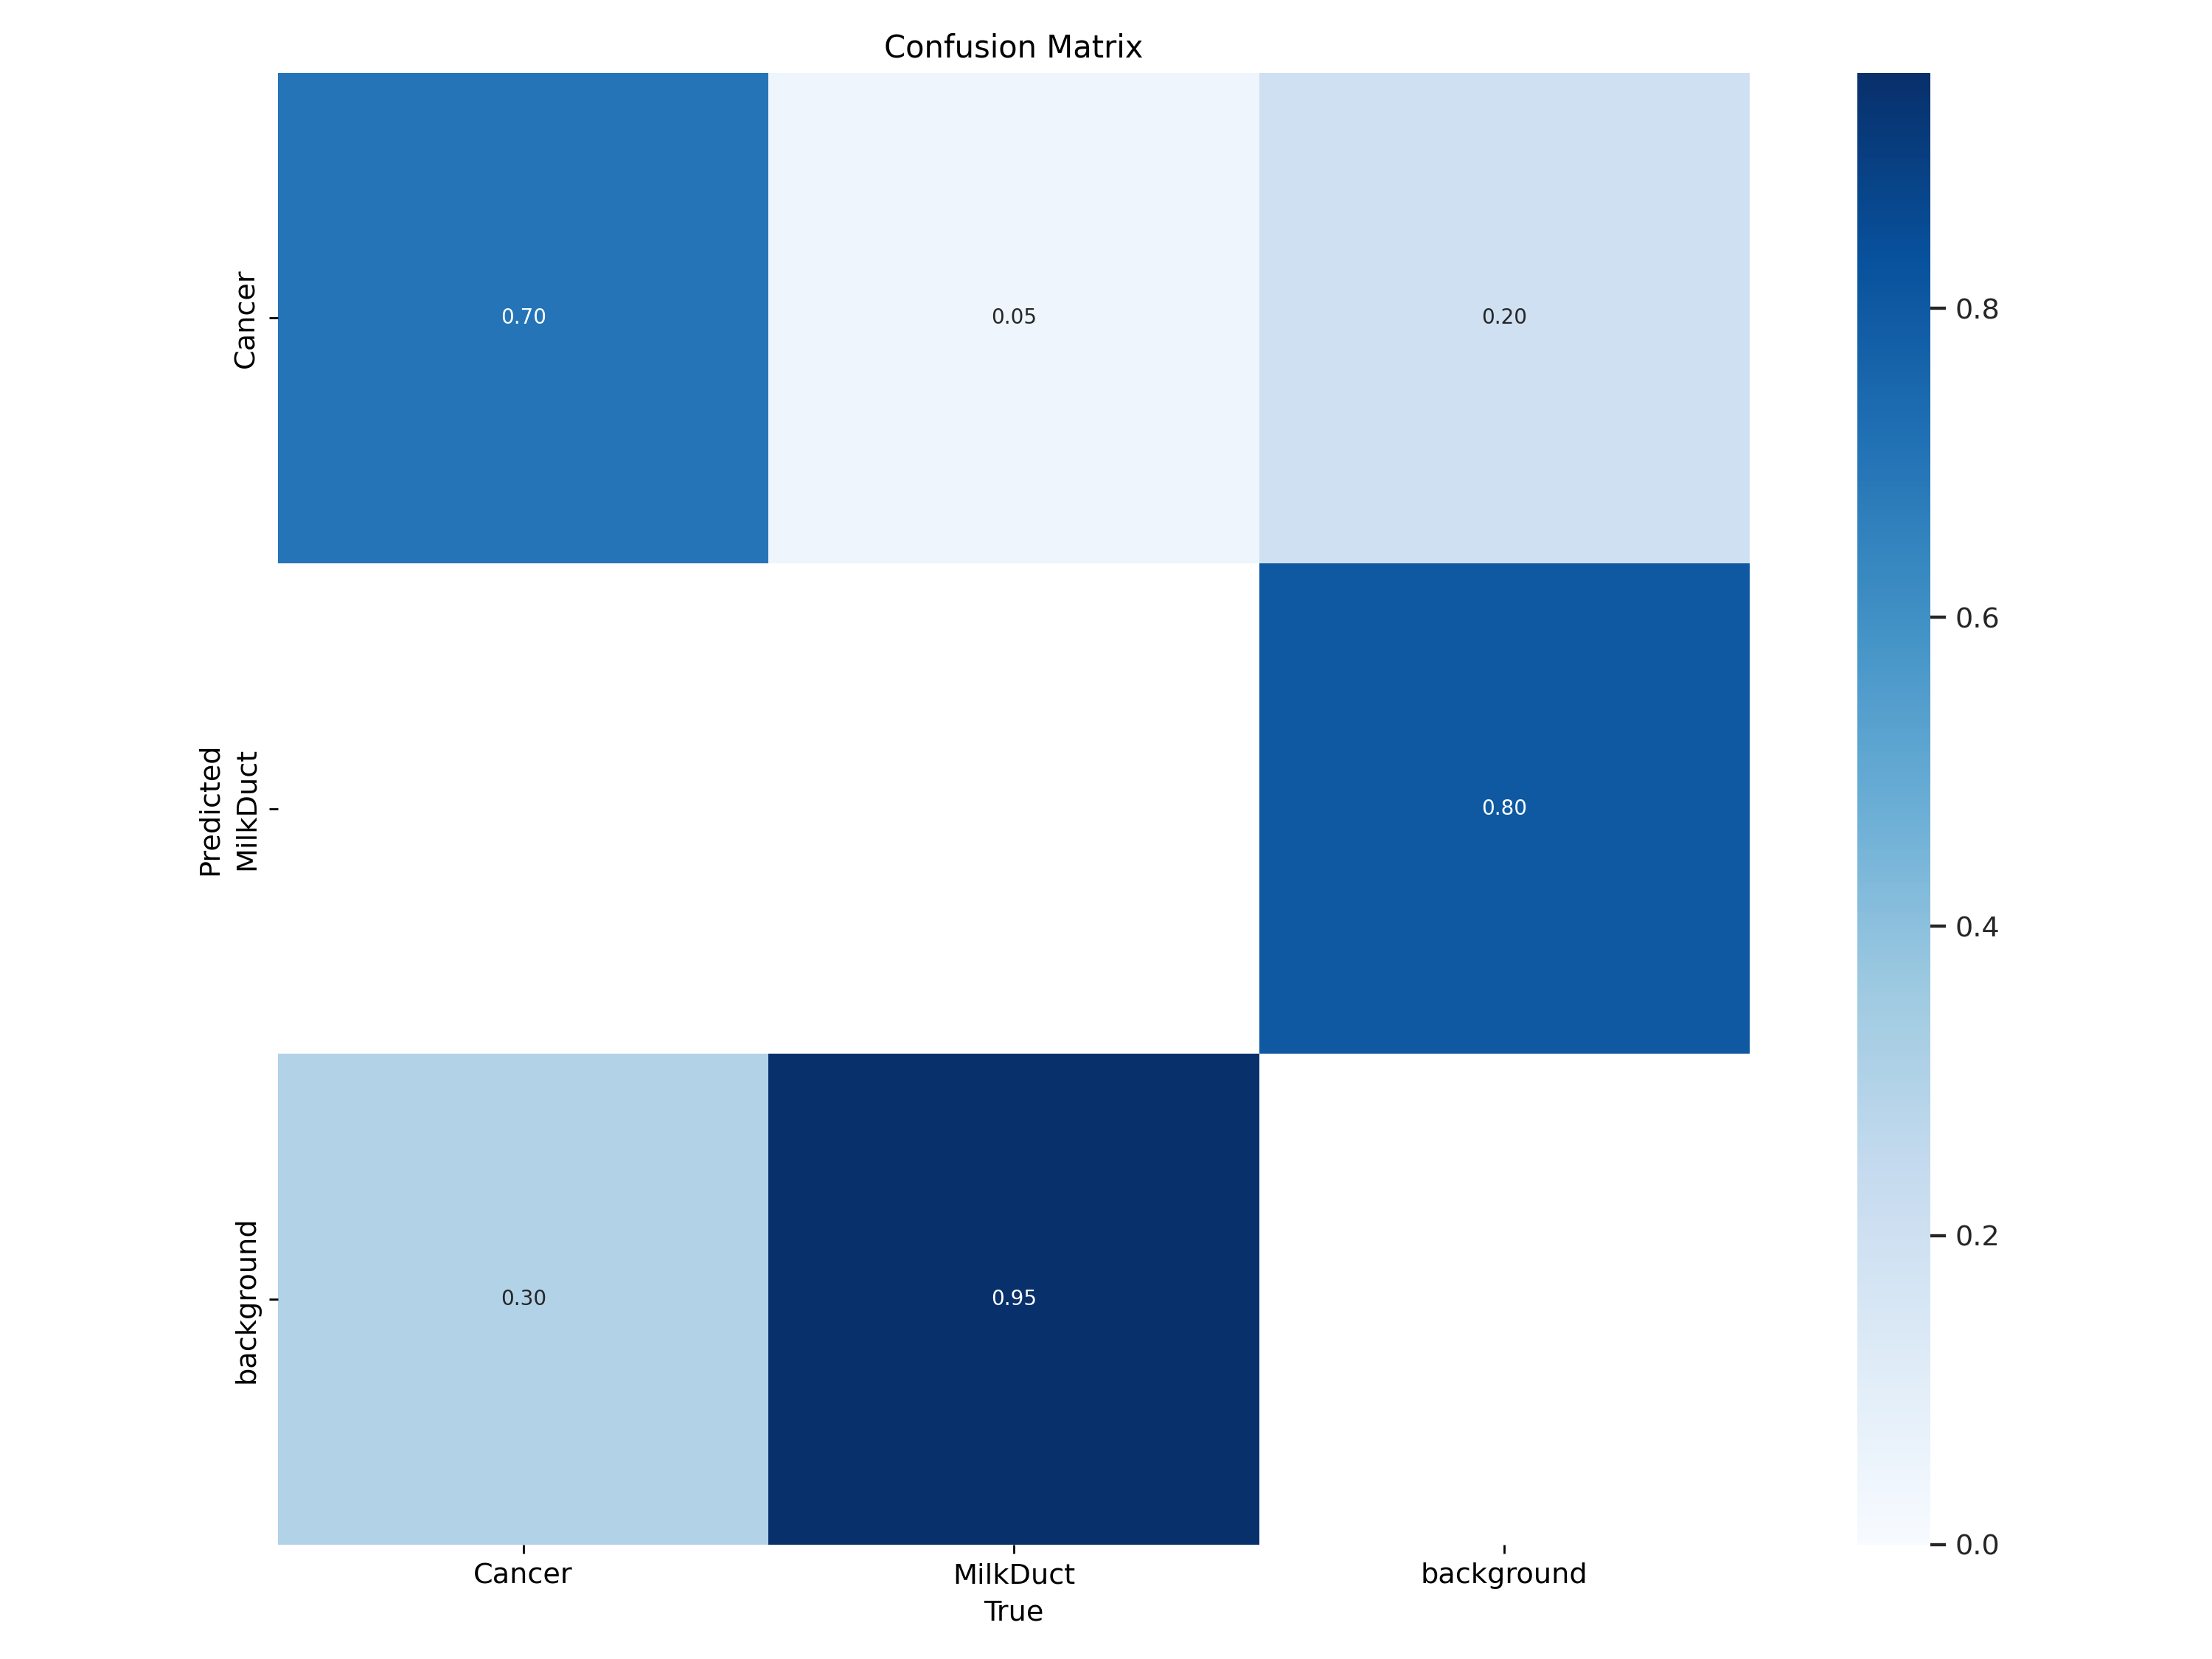

In [14]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/train/exp/F1_curve.png'): #assuming JPG
    display(Image(filename=imageName))



for imageName in glob.glob('/content/yolov5/runs/train/exp/PR_curve.png'): #assuming JPG
    display(Image(filename=imageName))


for imageName in glob.glob('/content/yolov5/runs/train/exp/P_curve.png'): #assuming JPG
    display(Image(filename=imageName))



for imageName in glob.glob('/content/yolov5/runs/train/exp/R_curve.png'): #assuming JPG
    display(Image(filename=imageName))



for imageName in glob.glob('/content/yolov5/runs/train/exp/confusion_matrix.png'): #assuming JPG
    display(Image(filename=imageName))


